In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import random
import scipy.spatial
import math
from matplotlib import cm
import AC

In [2]:
# Hace un triangulo equilatero
def createTriangle(point,perimeter):
    points = [point]
    a = perimeter/3
    h = np.sqrt(a**2-(a/2)**2)
    points.append([point[0]-a/2,point[1]-h])
    points.append([point[0]+a/2,point[1]-h])
    return np.array(points)

In [3]:
def getMiddlePoint(p1,p2):
    return np.array([(p1[0]+p2[0])/2,(p1[1]+p2[1])/2])

In [4]:
def allMiddlePoints(triangle):
    points = []
    p1,p2,p3 = triangle
    p12 = getMiddlePoint(p1,p2)
    points.append(p12)
    p13 = getMiddlePoint(p1,p3)
    points.append(p13)
    p23 = getMiddlePoint(p2,p3)
    points.append(p23)
    return np.array(points)

In [5]:
mean = lambda x: x.mean(axis=0)

In [6]:
center = lambda x: x.min(axis=0) + (x.max(axis=0) - x.min(axis=0))/2

In [7]:
def getDistance(points):
    n = points.shape[0]
    distance = 0
    distances = np.zeros(n)
    refPoint = points[0]
    for i, point in enumerate(points[1:], start=1):
        distance += np.linalg.norm(refPoint-point)
        distances[i] = distance
        refPoint = point
    return distance, distances

In [8]:
def recursion1(n, triangle, *, m0=None, m1=None, m2=None, m3=None, func=mean):
    if n == 0:
        return func(triangle).reshape(1,-1)
    else:
        result = []
        p1,p2,p3 = triangle
        p12 = getMiddlePoint(p1,p2)
        p13 = getMiddlePoint(p1,p3)
        p23 = getMiddlePoint(p2,p3)
        if m0 is not None:
            c0 = recursion1(m0-1, np.c_[p12,p2,p23].T, func=func)
        else:
            c0 = recursion1(n-1, np.c_[p12,p2,p23].T, func=func)
        if m1 is not None:
            c1 = recursion1(m1-1, np.c_[p23,p12,p13].T, func=func)
        else:
            c1 = recursion1(n-1, np.c_[p23,p12,p13].T, func=func)
        if m2 is not None:
            c2 = recursion1(m2-1, np.c_[p13,p23,p3].T, func=func)
        else:
            c2 = recursion1(n-1, np.c_[p13,p23,p3].T, func=func)
        if m3 is not None:
            c3 = recursion1(m3-1, np.c_[p1,p13,p12].T, func=func)
        else:
            c3 = recursion1(n-1, np.c_[p1,p13,p12].T, func=func)
        return np.r_[c0,c1,c2,c3]

In [9]:
def plotFillingCurve(triangle, n:'Number of iterations', func:'Function to generate filling curve',
                     figsize=(12,10)):
    # Create close triangle to plot
    closeTriangle = np.r_[triangle,triangle[:1]]
    # Create figure
    fig, ax = AC.createFigures(figsize=figsize)
    # Plot a map of how far are the points
    mapPoints = recursion1(8, triangle, func=func)
    _, mapDistances = getDistance(mapPoints)
    s = ax.scatter(mapPoints[:,0], mapPoints[:,1], marker='.', c=mapDistances, s=100, cmap='viridis');
    colorbar = fig.colorbar(s, ax=ax)
    ticks = 10
    colorbar.set_ticks(np.linspace(mapDistances.min(),mapDistances.max(),ticks),labels=np.linspace(0,1,ticks).round(1))
    # Plot the filing curve with n iterations
    points = recursion1(n, triangle, func=func)
    totalDistance, distances = getDistance(points)
    # Plot the curve with its distance
    ax.set_title(f'Distance: {round(totalDistance,3)}', fontsize=15, fontweight='bold')
    ax.plot(points[:,0], points[:,1], c='k', alpha=1);
    # Plot the perimeter of the triangle
    ax.plot(closeTriangle[:,0], closeTriangle[:,1], color=AC.specialPurple);

In [10]:
# Create triangle
triangle = createTriangle([20,20],60)

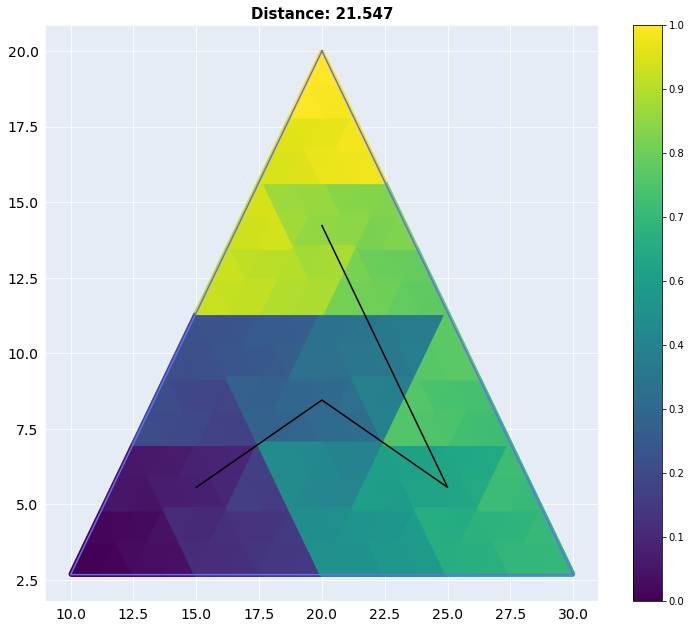

In [11]:
plotFillingCurve(triangle,n=1, func=mean)

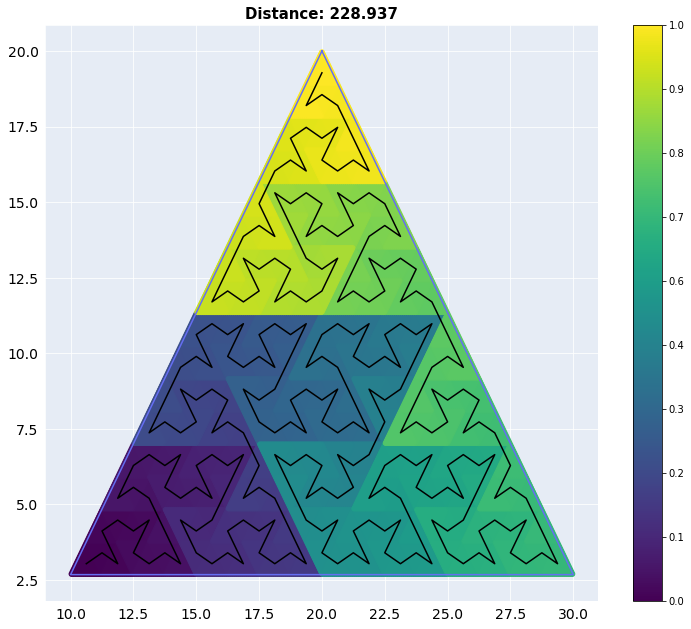

In [182]:
plotFillingCurve(triangle,n=4, func=mean)

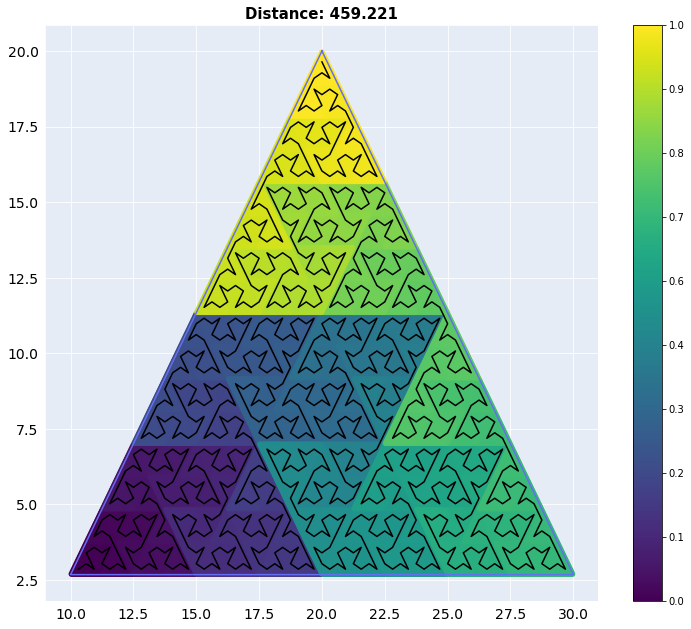

In [186]:
plotFillingCurve(triangle,n=5, func=mean)

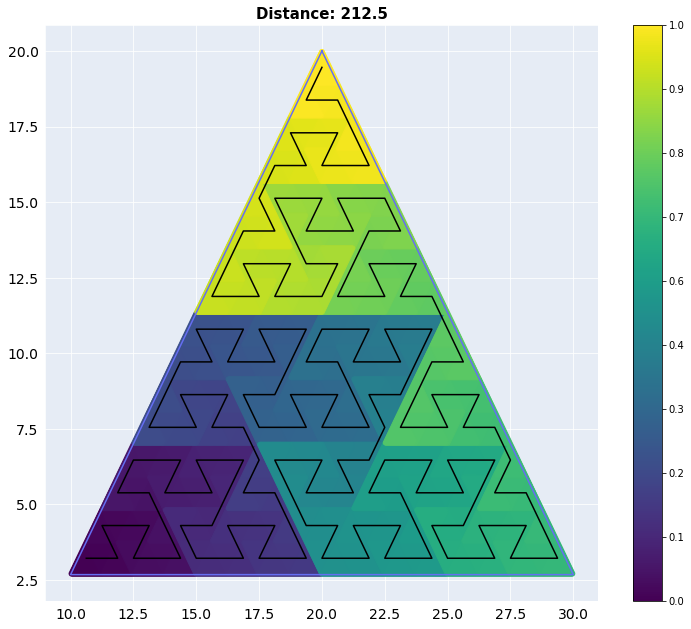

In [183]:
plotFillingCurve(triangle,n=4, func=center)

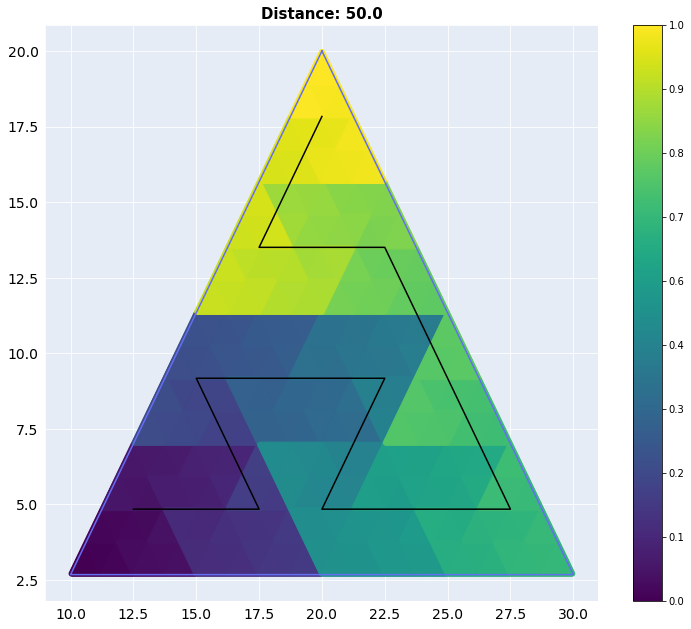

In [185]:
plotFillingCurve(triangle,n=2, func=center)